# Sentiment Analysis with NLP

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Renua-Meireles/sentiment-analisys-with-MLP/blob/main/MLP_Sentiment_Analysis_(PIBIC_2021).ipynb)

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import os

In [2]:
BASE_PATH = './data/'
datasetpath = f'{BASE_PATH}/movie.csv'
os.listdir(BASE_PATH)

['movie.csv']

## Loading Dataset

In [3]:
df = pd.read_csv(datasetpath, encoding='utf-8')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df.loc[0, 'text']

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [6]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [8]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
df.columns

Index(['text', 'label'], dtype='object')

Min: 4
Max: 2470
Mean: 231.328975
Standard Deviation: 171.1783333281242


<AxesSubplot:>

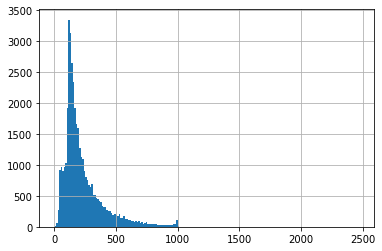

In [10]:
df['word_count'] = df['text'].apply(lambda x: len(x.split(' ')))

# print word count statistics
print('Min:', df['word_count'].min())
print('Max:', df['word_count'].max())
print('Mean:', df['word_count'].mean())
print('Standard Deviation:', df['word_count'].std())

#show the distribution of word count
df['word_count'].hist(bins=200)

In [11]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [12]:
nltk.download('stopwords', quiet=True)
stop_words = stopwords.words('english')

In [13]:
train_x, test_x, y_train, y_test = train_test_split(df.text, df.label, test_size=0.25,random_state=123)

### Tokenzation (method 1)

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>") # any unknown words will be replaced by oov_token

In [15]:
vocab_size = 40000 # unique words to train the network
max_length = int(df['word_count'].mean()) # the length of each review. If originally the comment is longer than "max_length" words, it will be truncated
trunc_type = 'post' # the review will be truncated at the end when a review is bigger than "max_length" or padded when a review is smaller than "max_length"
padding_type = 'post' # padding will be applied at the end, not in the beginning
oov_tok = '<OOV>' # any unknown words will be replaced by oov_token

In [16]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_x)
word_index = tokenizer.word_index

In [17]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'be': 27,
 'one': 28,
 'he': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'from': 35,
 'so': 36,
 'who': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'out': 43,
 'if': 44,
 "it's": 45,
 'has': 46,
 'there': 47,
 'some': 48,
 'what': 49,
 'good': 50,
 'more': 51,
 'when': 52,
 'very': 53,
 'up': 54,
 'no': 55,
 'time': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'she': 60,
 'which': 61,
 'only': 62,
 'really': 63,
 'see': 64,
 'story': 65,
 'their': 66,
 'can': 67,
 'had': 68,
 'me': 69,
 'well': 70,
 'were': 71,
 'than': 72,
 'much': 73,
 'we': 74,
 'bad': 75,
 'get': 76,
 'been': 77,
 'will': 78,
 'do': 79,
 'great': 80,
 'other': 81,
 'into': 82,
 '

In [23]:
seq = tokenizer.texts_to_sequences(train_x)
train_x_tokenized_padded = pad_sequences(seq, maxlen=max_length, truncating=trunc_type)
seq = tokenizer.texts_to_sequences(test_x)
test_x_tokenized_padded = pad_sequences(seq, maxlen=max_length)

In [24]:
train_x_tokenized_padded

array([[    0,     0,     0, ...,    33, 14403,   201],
       [  583,    64,    83, ...,    24,    47,     3],
       [    0,     0,     0, ..., 37892,    67, 23937],
       ...,
       [    0,     0,     0, ...,    18,     8,     8],
       [    0,     0,     0, ...,    46,   124,   107],
       [    0,     0,     0, ...,   346,     8,     8]], dtype=int32)

### Vectorization (method 2)

In [19]:
#TF-IDF
tfv = TfidfVectorizer(min_df=3,  max_features=None, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1, stop_words = 'english')

tfv.fit(list(train_x) + list(test_x))
train_x_tfv =  tfv.transform(train_x) 
test_x_tfv = tfv.transform(test_x)

In [20]:
train_x.shape

(30000,)

In [21]:
y_train.shape

(30000,)

In [22]:
test_x.shape, y_test.shape

((10000,), (10000,))

In [23]:
dataset = tf.data.experimental.make_csv_dataset(datasetpath, batch_size=32,
                                                select_columns=['\ufefftext', 'label'],
                                                label_name='label')

In [24]:
for features, labels in dataset.take(1): # first batch
    print(labels)
    for key, value in features.items():
        print("{:20s}: {}".format(key,value.numpy()))

tf.Tensor([0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1], shape=(32,), dtype=int32)
﻿text               : [b"What a drawn out painful experience.<br /><br />That's over two hours of my life I will never get back.<br /><br />This Film Festival Director's delight - is awash with overuse of the long slow shot....however - that's not the only thing that makes a script.<br /><br />Avoid this movie at all costs."
 b'As a rule, I try to find as much in films as I possibly can to enjoy them. I made no exceptions with "Tart", doing my very best to appreciate it for what it was. But no effort, no matter how great, could possibly redeem this pitiful excuse for a movie.<br /><br />It failed for a number of reasons. Firstly, the cinematography was directionless and ineffective. Secondly, the script reached depths of \'poor\' that took it well and truly beyond the \'so bad it\'s good\' category. Thirdly, the acting left mind-blowing amounts to be desired - it was appalling, it rea

In [25]:
dataset = dataset.map(lambda x, y: (tf.concat([tf.expand_dims(x['\ufefftext'], axis=-1)], axis=-1), y))

## Building the model

In [18]:
model = tf.keras.Sequential([
    layers.Input(shape=(max_length, )),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile('adam', tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                7424      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,817
Trainable params: 14,817
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [21]:
# Create a callback that saves the model's weights
if not os.path.isdir('./Weights_per_epochs'):
    os.mkdir('./Weights_per_epochs')
checkpoint_path = "./Weights_per_epochs/weights{epoch:02d}.hdf5"
callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [25]:
epochs = 15
history = model.fit(train_x_tokenized_padded, y_train, 
                    epochs=epochs, 
                    validation_data=(test_x_tokenized_padded, y_test),
                    callbacks=[callback])

Epoch 1/15
934/938 [============================>.] - ETA: 0s - loss: 23.4076 - accuracy: 0.4950
Epoch 1: saving model to ./Weights_per_epochs/weights01.hdf5
938/938 [==============================] - 6s 3ms/step - loss: 23.3294 - accuracy: 0.4949 - val_loss: 3.7083 - val_accuracy: 0.4963
Epoch 2/15
924/938 [============================>.] - ETA: 0s - loss: 2.1903 - accuracy: 0.5051
Epoch 2: saving model to ./Weights_per_epochs/weights02.hdf5
938/938 [==============================] - 4s 4ms/step - loss: 2.1818 - accuracy: 0.5043 - val_loss: 1.4816 - val_accuracy: 0.4948
Epoch 3/15
935/938 [============================>.] - ETA: 0s - loss: 1.1877 - accuracy: 0.5083
Epoch 3: saving model to ./Weights_per_epochs/weights03.hdf5
938/938 [==============================] - 3s 3ms/step - loss: 1.1879 - accuracy: 0.5082 - val_loss: 1.0788 - val_accuracy: 0.4994
Epoch 4/15
919/938 [============================>.] - ETA: 0s - loss: 0.9480 - accuracy: 0.5140
Epoch 4: saving model to ./Weights_per

### Model Performance

<Figure size 432x288 with 0 Axes>

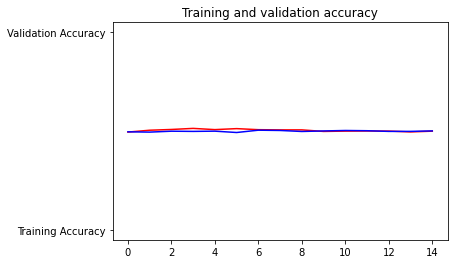

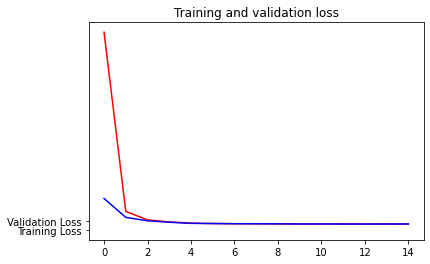

<Figure size 432x288 with 0 Axes>

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

## Histograms

In [42]:
list_weights = os.listdir('./Weights_per_epochs')
list_weights

['weights04.hdf5',
 'weights09.hdf5',
 'weights07.hdf5',
 'weights11.hdf5',
 'weights14.hdf5',
 'weights03.hdf5',
 'weights10.hdf5',
 'weights01.hdf5',
 'weights02.hdf5',
 'weights12.hdf5',
 'weights15.hdf5',
 'weights06.hdf5',
 'weights13.hdf5',
 'weights05.hdf5',
 'weights08.hdf5']

In [40]:
def get_weights_from_layer(model, weights_dir, layer_number, num_epochs):
    weights = np.array([])
    for i in range(num_epochs):
        loaded_weights = model.load_weights(f'{weights_dir}/{list_weights[i]}')
        print(loaded_weights.shape)
        weights = np.append(weights, loaded_weights[layer_number])
    
    weights = weights.reshape(num_epochs, -1)
    return weights

In [41]:
w = get_weights_from_layer(model, './Weights_per_epochs', 0, 15)
w

AttributeError: 'NoneType' object has no attribute 'shape'

In [33]:
model.load_weights(f'./Weights_per_epochs/{list_weights[-1]}')

In [35]:
model.layers[0].get_weights()

[array([[ 0.06940084,  0.05383415,  0.11057767, ..., -0.07337356,
          0.09616297, -0.03799424],
        [ 0.00994303,  0.10148703,  0.03971534, ...,  0.05462777,
         -0.1294199 , -0.10050377],
        [ 0.08211949,  0.11114664,  0.09551448, ...,  0.0659413 ,
          0.09429293, -0.09146108],
        ...,
        [-0.09567137,  0.0926213 ,  0.069566  , ..., -0.01309191,
         -0.18692078,  0.0408461 ],
        [-0.04827422, -0.01825774, -0.03318117, ..., -0.15440477,
          0.07889239, -0.13316436],
        [-0.1841805 , -0.10973747, -0.06166623, ..., -0.01913395,
         -0.07471811,  0.00434041]], dtype=float32),
 array([-0.18827784, -0.03549989, -0.13562472, -0.21017984, -0.16705711,
        -0.15910035, -0.13413735, -0.16516402, -0.06642793, -0.19489682,
        -0.16525245, -0.14811921,  0.01670153, -0.15918316, -0.16287708,
        -0.19691907, -0.19700752, -0.10120298, -0.18137869, -0.18569092,
        -0.11813401, -0.15691517, -0.03720944, -0.17643462,  0.552